In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = 'data/experiment-err-xp.csv'
df = pd.read_csv(file_path)
df

,[step],j-sidewalk,j-noInView,j-calc,[step].1,j-sidewalk.1,j-noInView.1,j-calc.1,[step].2,j-sidewalk.2,...,j-noInView.48,j-calc.48,[step].49,j-sidewalk.49,j-noInView.49,j-calc.49,[step].50,j-sidewalk.50,j-noInView.50,j-calc.50
0,167088,10,2,7,169182,13,2,6,169624,8,...,1,23,164902,10,1,25,164894,11,1,27


In [4]:
# 使用numpy分割数据框
num_cols = df.shape[1]
split_dfs = np.split(df, num_cols // 4, axis=1)

# 删除每组的第一个元素（列）
split_dfs = [df_group.drop(df_group.columns[0], axis=1) for df_group in split_dfs]

# 创建一个字典，将键从20分配给每个组,观测范围
result_dict = {}
key_start = 0

for i, split_df in enumerate(split_dfs):
    # 将数据框转换为列表形式
    split_list = split_df.values.tolist()
    # 将列表存储到字典中
    key = round(key_start + i*0.1 ,2)
    result_dict[key] = split_list

# 显示最终字典
print(result_dict)

{0.0: [[10, 2, 7]], 0.1: [[13, 2, 6]], 0.2: [[8, 1, 4]], 0.3: [[8, 2, 4]], 0.4: [[7, 2, 2]], 0.5: [[5, 0, 7]], 0.6: [[12, 0, 4]], 0.7: [[10, 0, 6]], 0.8: [[12, 1, 7]], 0.9: [[7, 1, 5]], 1.0: [[7, 1, 9]], 1.1: [[16, 1, 7]], 1.2: [[9, 1, 10]], 1.3: [[12, 1, 9]], 1.4: [[8, 1, 9]], 1.5: [[9, 0, 7]], 1.6: [[11, 1, 7]], 1.7: [[9, 0, 8]], 1.8: [[8, 0, 10]], 1.9: [[10, 0, 6]], 2.0: [[10, 1, 7]], 2.1: [[10, 2, 7]], 2.2: [[14, 2, 16]], 2.3: [[11, 0, 14]], 2.4: [[9, 0, 10]], 2.5: [[9, 1, 8]], 2.6: [[4, 3, 15]], 2.7: [[7, 0, 10]], 2.8: [[10, 0, 9]], 2.9: [[11, 0, 13]], 3.0: [[13, 0, 15]], 3.1: [[13, 2, 10]], 3.2: [[9, 0, 19]], 3.3: [[7, 1, 14]], 3.4: [[11, 2, 20]], 3.5: [[10, 0, 13]], 3.6: [[14, 0, 19]], 3.7: [[9, 3, 14]], 3.8: [[11, 0, 16]], 3.9: [[12, 2, 15]], 4.0: [[8, 2, 22]], 4.1: [[8, 1, 23]], 4.2: [[6, 1, 29]], 4.3: [[10, 1, 14]], 4.4: [[13, 1, 28]], 4.5: [[6, 2, 22]], 4.6: [[9, 1, 29]], 4.7: [[9, 0, 27]], 4.8: [[8, 1, 23]], 4.9: [[10, 1, 25]], 5.0: [[11, 1, 27]]}


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


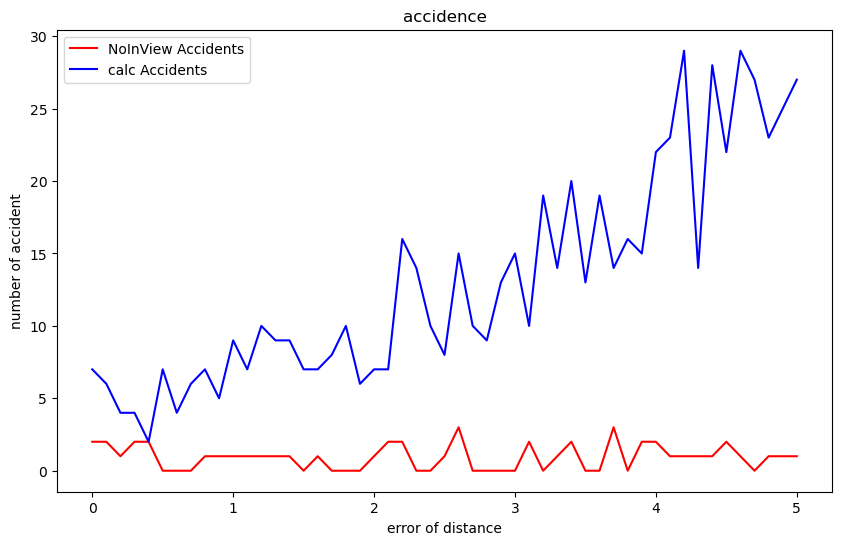

In [5]:
# 提取x轴（keys）和y轴（每个list的第二个元素）
x_values = list(result_dict.keys())
y_values = [value[0][1] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y_values)

# 提取y轴（每个list的第3个元素）
y2_values = [value[0][2] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y2_values)

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='', linestyle='-', color='r', label='NoInView Accidents')
plt.plot(x_values, y2_values, marker='', linestyle='-', color='b', label='calc Accidents')

# 设置标题和标签
plt.title('accidence')
plt.xlabel('error of distance')
plt.ylabel('number of accident')
plt.legend()

# 显示图表
plt.show()

回归系数 (Slope): 4.46606334841629
截距 (Intercept): 1.9132730015082942
均方误差 (Mean Squared Error): 11.915372785615002
R² (Coefficient of Determination): 0.7838720423485689


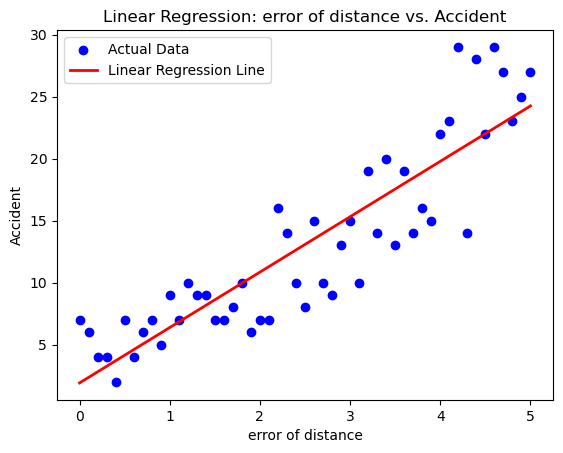

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 示例数据
# 假设你有两个列表，一个是观测距离，另一个是对应的交通事故概率
observation_distance = np.array(x_values).reshape(-1, 1)
accident_probability = np.array(y2_values)

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(observation_distance, accident_probability)

# 预测值
predicted_probabilities = model.predict(observation_distance)

# 输出回归系数
print(f"回归系数 (Slope): {model.coef_[0]}")
print(f"截距 (Intercept): {model.intercept_}")

# 计算模型性能
mse = mean_squared_error(accident_probability, predicted_probabilities)
r2 = r2_score(accident_probability, predicted_probabilities)
print(f"均方误差 (Mean Squared Error): {mse}")
print(f"R² (Coefficient of Determination): {r2}")

# 可视化回归结果
plt.scatter(observation_distance, accident_probability, color='blue', label='Actual Data')
plt.plot(observation_distance, predicted_probabilities, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('error of distance')
plt.ylabel('Accident')
plt.title('Linear Regression: error of distance vs. Accident')
plt.legend()
plt.show()